In [5]:
#Measure pitch of all wav files in directory
import glob
import numpy as np
import pandas as pd
import parselmouth
from parselmouth.praat import call

In [6]:
# This is the function to measure voice pitch
def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID) # read the sound
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    return meanF0, stdevF0, hnr

In [7]:
! dir "\Users\User\S_sprechstile_eigene\Wegner"
# zeigt wo die Segmente sind, also den Pfad
# in den Ordner darüber gehen weil dort die Dateien liegen
# als Kontrolle sind da die Segmente

 Datentr„ger in Laufwerk C: ist Acer
 Volumeseriennummer: BC07-5B18

 Verzeichnis von C:\Users\User\S_sprechstile_eigene\Wegner

18.05.2021  15:04    <DIR>          .
18.05.2021  15:04    <DIR>          ..
06.05.2021  13:28                68 Wegner_16_seg_00000000.txt
27.04.2021  15:23           214.124 Wegner_16_seg_00000000.wav
06.05.2021  13:28                68 Wegner_16_seg_00000001.txt
27.04.2021  15:23            57.004 Wegner_16_seg_00000001.wav
06.05.2021  13:28                68 Wegner_16_seg_00000002.txt
27.04.2021  15:23            93.484 Wegner_16_seg_00000002.wav
06.05.2021  13:28                68 Wegner_16_seg_00000003.txt
27.04.2021  15:23           196.204 Wegner_16_seg_00000003.wav
06.05.2021  13:28                68 Wegner_16_seg_00000004.txt
27.04.2021  15:23           140.204 Wegner_16_seg_00000004.wav
06.05.2021  13:28                68 Wegner_16_seg_00000005.txt
27.04.2021  15:23           119.084 Wegner_16_seg_00000005.wav
06.05.2021  13:29                68 We

In [8]:
sample_path = "../Wegner/"
#nicht relevant
# .. ist Abkürzung für Elternverzeichnis
#. ist für das aktuelle Verzeichnis

In [9]:
import os
dir = os.system('ls{}'.format(sample_path))
dir
#ist nicht wichtig

1

In [10]:
os.popen("ls")
#ist nicht wichtig

In [12]:
# create lists to put the results
file_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []

# Go through all the wave files in the folder and measure pitch
for wave_file in glob.glob(sample_path+ "../Wegner/*.wav"):
    #print(f'processing {os.path.basename.wave_file}')
    sound = parselmouth.Sound(wave_file)
    (meanF0, stdevF0, hnr) = measurePitch(sound, 75, 500, "Hertz")
    file_list.append(wave_file) # make an ID list
    mean_F0_list.append(meanF0) # make a mean F0 list
    sd_F0_list.append(stdevF0) # make a sd F0 list
    hnr_list.append(hnr)

df = pd.DataFrame(np.column_stack([file_list, mean_F0_list, sd_F0_list, hnr_list]), 
                               columns=['voiceID', 'meanF0Hz', 'stdevF0Hz', 'HNR'])  #add these lists to pandas in the right order



# Write out the updated dataframe
df.to_csv("processed_results.csv", index=False)

In [13]:
df.head (4)
# Voice id ausgegeben und 3 berechnete Werte

,voiceID,meanF0Hz,stdevF0Hz,HNR
0,../Wegner/../Wegner\Wegner_16_seg_00000000.wav,216.6457657532109,40.31293341884199,12.388043180954861
1,../Wegner/../Wegner\Wegner_16_seg_00000001.wav,219.36542836968232,32.64501757346065,16.261678136449415
2,../Wegner/../Wegner\Wegner_16_seg_00000002.wav,248.55446333074877,45.63510529682233,19.494601402674427
3,../Wegner/../Wegner\Wegner_16_seg_00000003.wav,205.0891849345778,37.16373257038798,12.098336405604732


In [14]:
df_out= df[['voiceID', 'meanF0Hz']]
#datenframe erzeugt mit 2 Spalten
# nur datenframe mit mittlerer Grundfrequenz

In [15]:
df_out.head(1)

,voiceID,meanF0Hz
0,../Wegner/../Wegner\Wegner_16_seg_00000000.wav,216.6457657532109


In [16]:
df_out.to_pickle('../f0df.pkl')
# pickle ist sowas wo man was einpackt zum transport
# damit man ihm in einem anderen DAtenframe nutzen kann

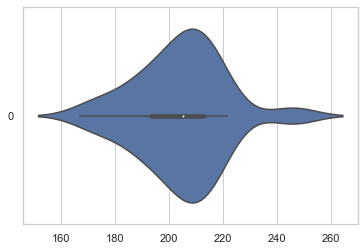

In [18]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.violinplot(data=df["meanF0Hz"], orient='h')